In [1]:
#Social_Network_Ads.csv

**Import libraries**

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

**Importing the dataset**

In [3]:
data = pd.read_csv('Social_Network_Ads.csv')
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
data = pd.get_dummies(data,drop_first=True)
data.head()

,User ID,Age,EstimatedSalary,Purchased,Gender_Male
0,15624510,19,19000,0,1
1,15810944,35,20000,0,1
2,15668575,26,43000,0,0
3,15603246,27,57000,0,0
4,15804002,19,76000,0,1


In [5]:
features = [feat for feat in data.columns if feat!= "Purchased" and feat!='User ID']
X = data[features]
Y = data.Purchased

In [6]:
X.head()

,Age,EstimatedSalary,Gender_Male
0,19,19000,1
1,35,20000,1
2,26,43000,0
3,27,57000,0
4,19,76000,1


In [7]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

**Splitting the dataset into the Training set and Test set**

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=300)

In [9]:
x_test.head()

,Age,EstimatedSalary,Gender_Male
170,21,88000,1
67,23,82000,0
395,46,41000,0
276,38,71000,1
231,39,42000,1


In [10]:
x_train.head()

,Age,EstimatedSalary,Gender_Male
281,35,61000,1
130,31,58000,1
61,25,87000,1
63,32,120000,1
59,32,117000,0


**Feature Scaling**

In [11]:
from sklearn.preprocessing import StandardScaler
scl = StandardScaler()
x_train = pd.DataFrame(scl.fit_transform(x_train),columns=x_train.columns)
x_test = pd.DataFrame(scl.fit_transform(x_test),columns=x_test.columns)

**Fitting SVM to the Training set**

In [12]:
from sklearn.svm import SVC
SVCL = SVC()

In [13]:
SVCL.fit(x_train,y_train)

SVC()

**Predicting the Test set results**

In [14]:
y_pred = SVCL.predict(x_test)

**Making the Confusion Matrix**

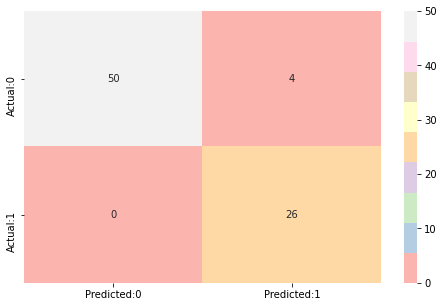







--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        54
           1       0.87      1.00      0.93        26

    accuracy                           0.95        80
   macro avg       0.93      0.96      0.95        80
weighted avg       0.96      0.95      0.95        80



In [15]:
from sklearn.metrics import classification_report,confusion_matrix
cm = confusion_matrix(y_test, y_pred)
conf_matrix = pd.DataFrame(data = cm, 
                           columns = ['Predicted:0', 'Predicted:1'], 
                           index =['Actual:0', 'Actual:1'])
plt.figure(figsize = (8, 5))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap ='Pastel1' )
plt.show()
print('\n')
print('\n')
print('\n')
print('-'*80)
report = classification_report(y_test,y_pred)
print(report)

**Visualising the Training set results**

In [31]:
SVCL.score(x_train,y_train)

0.9

In [23]:
from matplotlib.colors import ListedColormap
X_set, y_set = x_train, y_train

**Visualising the Test set results**

In [30]:
SVCL.score(x_test,y_test)

0.95